### Two Body Simulation

A worksheet to simulate two spiraling black holes, using Post-Minkowski corrections to accounts for effects of relativity.

In [3]:
using DifferentialEquations
using Plots

In [114]:
#This cell contains the derivative of the Hamiltonian, used to calculate change in position and change in momentum

function Hamiltonian(du, u, p, t)
    x1 = u[1]
    y1 = u[2]
    p1x = u[3]
    p1y = u[4]
    x2 = u[5]
    y2 = u[6]
    p2x = u[7]
    p2y = u[8]
    
    m1 = p[1]
    m2 = p[2]
    G = p[3]

	difX, difY = x2 - x1, y2 - y1
	r = (((difX ^ 2) + (difY ^ 2)) ^ 1.5)
	top = G * m1 * m2
    
	du[1], du[2] = p1x / m1, p1y / m1
	du[3], du[4] = top * difX / r, top * difY / r
    
	du[5], du[6] = p2x / m2, p2y / m2
	du[7], du[8] = - top * difX / r, - top * difY / r
end

@userplot TwoBodyPlot
@recipe function f(tb::TwoBodyPlot)
    m, x, y, xarray, yarray, negx, posx, negy, posy = tb.args
    n = 100
    xlims --> (negx, posx)
    ylims --> (negy, posy)
    append!(xarray, x)
    append!(yarray, y)
    if size(xarray)[1] > n
        deleteat!(xarray, 1)
        deleteat!(yarray, 1)
    end
    linewidth --> range(0, m * 10, length = n)
    #seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    xarray, yarray
end

In [115]:
## This cell is for setting the parameters of the code

m1 = 12; # Mass of the first body in solar masses
m2 = 100; # Mass of the second body
D = 12; # Initial separation of the bodies, in kilometers
ecc = 0.5; # eccentricity of the orbits
G = 1; # Gravitational constant

GSI = 6.647e-11;
MSUN = 1.989e30;
KM = 1000;

M = MSUN;
L = KM;
T = sqrt(L^3 / (GSI * M));

pUnits = M * L / T
KEUnits = pUnits * L / T;

In [116]:
## Calculates factors based on eccentricity

if !(0 <= ecc <= 1)
    ecc = 0.0
end
qfac = 1 - ecc;
pfac = sqrt((1 + ecc)/(1 - ecc));

In [117]:
## Calculates inital position and momentum

mu = m1 * m2 / (m1 + m2)
p_theta = sqrt(G * m1 * m2 * mu * D )

x2 = D / (1 + (m1 / m2));
x1 = x2 - D;
py2 = p_theta / D;
py1 = -py2;

In [118]:
c0 = [m1, m2, G]
q01 = [x1 * qfac, 0.0]
p01 = [0.0, py1 * pfac]
q02 = [x2 * qfac, 0.0]
p02 = [0.0, py2 * pfac]
u0 = collect(Base.Iterators.flatten([q01, p01, q02, p02]));

pi1, pi2 = sqrt((p01[1]^2) + (p01[2]^2)), sqrt((p02[1]^2) + (p02[2]^2));
KEi1, KEi2 = pi1^2 / (2 * m1), pi2^2 / (2 * m2);
initialKE1, initialKE2 = KEi1 * KEUnits, KEi2 * KEUnits

(3.521830752723214e49, 4.226196903267857e48)

In [119]:
tspan = (0.0, 100.0)

(0.0, 100.0)

In [120]:
prob = ODEProblem(Hamiltonian, u0, tspan, c0)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [-0.6428571428571432, 0.0, 0.0, -56.694670951384076, 5.357142857142857, 0.0, 0.0, 56.694670951384076]

In [121]:
sol = solve(prob, RK4(), adaptive = true, reltol = 1.0e-8, abstol = 1.0e-8, saveat = 0.1);

In [122]:
ss1 = sol[1,:]
ss2 = sol[2,:]
ss3 = sol[5,:]
ss4 = sol[6,:];

len = size(sol[1,:])[1]

pf1, pf2 = sqrt((sol[3,:][len]^2) + (sol[4,:][len]^2)), sqrt((sol[7,:][len]^2) + (sol[8,:][len]^2));
KEf1, KEf2 = pf1^2 / (2 * m1), pf2^2 / (2 * m2);
finalKE1, finalKE2 = KEf1 * KEUnits, KEf2 * KEUnits 
dKE1, dKE2 = finalKE1 - initialKE1, finalKE2 - initialKE2
xf, yf = ss1[len] - ss3[len], ss2[len] - ss4[len]
Df = sqrt(xf^2 + yf^2)
println(dKE1)
println(dKE2)
println(Df)

-7.254943160001206e48
-8.705931792001445e47
7.096387628828331


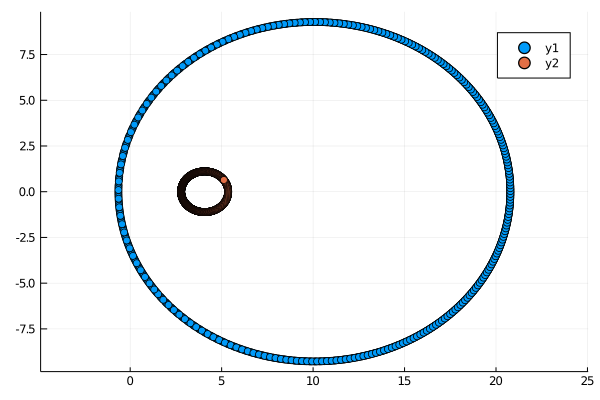

In [123]:
scatter(ss1, ss2, aspect_ratio = :equal);
plt = scatter!(ss3, ss4, aspect_ratio = :equal)

┌ Info: Saved animation to 
│   fn = /Users/zackarywindham/Research/grav_waves/tmp.gif
└ @ Plots /Users/zackarywindham/.julia/packages/Plots/E3MWZ/src/animation.jl:104


Plots.AnimatedGif("/Users/zackarywindham/Research/grav_waves/tmp.gif")
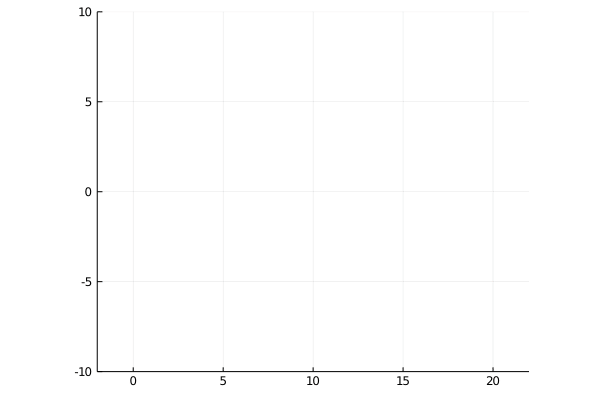

In [125]:
xarr1, yarr1, xarr2, yarr2 = [], [], [], []
xneg, xpos, yneg, ypos = -2, 22, -10, 10

r = m1 / m2
m10 = r / (1 + r)
m20 = 1 - m10

anim = @gif for i = 1:size(ss1)[1]
    twobodyplot(m10, ss1[i], ss2[i], xarr1, yarr1, xneg, xpos, yneg, ypos)
    twobodyplot!(m20, ss3[i], ss4[i], xarr2, yarr2, xneg, xpos, yneg, ypos)
    end every 5